# Serie de tiempo del pulso en una persona
## Cargar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

In [8]:
data=pd.read_csv("PWs_Carotid_P.csv")
data

,Subject Number,pt1,pt2,pt3,pt4,pt5,pt6,pt7,pt8,pt9,...,pt477,pt478,pt479,pt480,pt481,pt482,pt483,pt484,pt485,pt486
0,1,73.905,74.013,74.239,74.598,75.088,75.691,76.380,77.127,77.904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,73.905,74.014,74.240,74.599,75.089,75.692,76.380,77.127,77.904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,73.905,74.014,74.239,74.599,75.089,75.691,76.380,77.127,77.904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,72.048,72.106,72.278,72.597,73.078,73.713,74.480,75.344,76.272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,73.080,73.119,73.256,73.524,73.939,74.496,75.175,75.945,76.775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,254,61.195,61.237,61.628,62.568,64.052,65.877,67.795,69.660,71.433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,255,63.229,63.356,63.844,64.783,66.082,67.546,69.014,70.416,71.752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,256,64.761,64.866,65.304,66.160,67.350,68.693,70.037,71.320,72.542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,257,61.627,61.781,62.328,63.362,64.784,66.386,67.994,69.532,70.998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.isna().sum()

Subject Number      0
 pt1                0
 pt2                0
 pt3                0
 pt4                0
                 ... 
 pt482            257
 pt483            257
 pt484            257
 pt485            257
 pt486            257
Length: 487, dtype: int64

In [13]:
data[" pt1"]

0      73.905
1      73.905
2      73.905
3      72.048
4      73.080
        ...  
253    61.195
254    63.229
255    64.761
256    61.627
257    61.626
Name:  pt1, Length: 258, dtype: float64

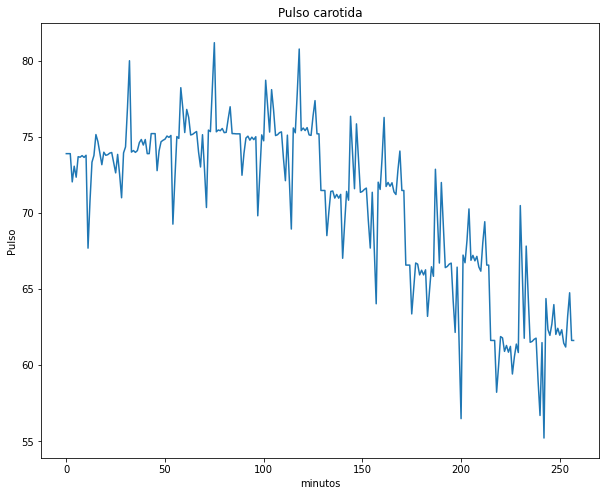

In [14]:
#Gráfico
plt.figure(figsize=(10,8))
plt.plot(data[" pt1"])
plt.title('Pulso carotida')
plt.ylabel('Pulso')
plt.xlabel('minutos')
plt.show()

## Preprocesamiento de los datos

In [15]:
ind = pd.date_range('1/1/2021', periods=258 , freq='S')
len(ind)
PCts =pd.Series(data[' pt1'].values,index=ind)
#SerieInt
type(PCts)
print(ind)
print(PCts)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:00:01',
               '2021-01-01 00:00:02', '2021-01-01 00:00:03',
               '2021-01-01 00:00:04', '2021-01-01 00:00:05',
               '2021-01-01 00:00:06', '2021-01-01 00:00:07',
               '2021-01-01 00:00:08', '2021-01-01 00:00:09',
               ...
               '2021-01-01 00:04:08', '2021-01-01 00:04:09',
               '2021-01-01 00:04:10', '2021-01-01 00:04:11',
               '2021-01-01 00:04:12', '2021-01-01 00:04:13',
               '2021-01-01 00:04:14', '2021-01-01 00:04:15',
               '2021-01-01 00:04:16', '2021-01-01 00:04:17'],
              dtype='datetime64[ns]', length=258, freq='S')
2021-01-01 00:00:00    73.905
2021-01-01 00:00:01    73.905
2021-01-01 00:00:02    73.905
2021-01-01 00:00:03    72.048
2021-01-01 00:00:04    73.080
                        ...  
2021-01-01 00:04:13    61.195
2021-01-01 00:04:14    63.229
2021-01-01 00:04:15    64.761
2021-01-01 00:04:16    61.627
2021-01-01

## Analisis descripitivo

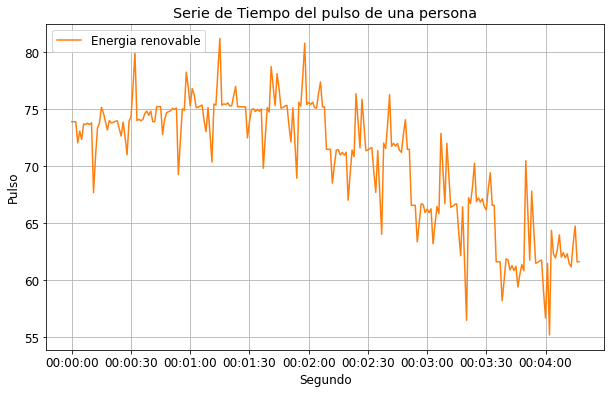

In [16]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(PCts, color='tab:orange', label='Energia renovable')
ax.set_xlabel('Segundo')
ax.set_ylabel('Pulso')
ax.set_title('Serie de Tiempo del pulso de una persona')
ax.grid(True)
ax.legend(loc='upper left');

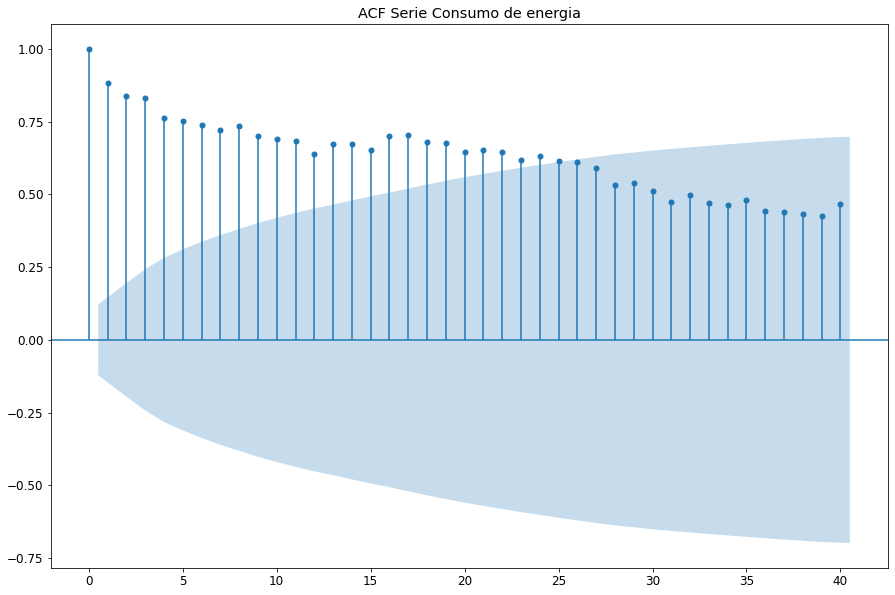

In [17]:
a=plot_acf(PCts,adjusted=False,lags=40,title='ACF Serie Consumo de energia')

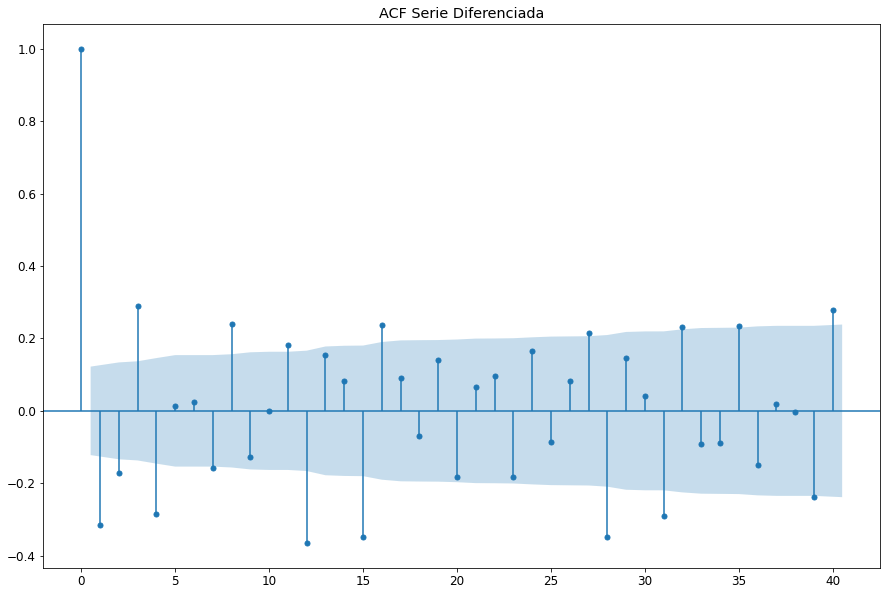

In [18]:
dif_PCts=PCts.diff(periods=1)
b=plot_acf(dif_PCts.dropna(),adjusted=False,lags=40,title='ACF Serie Diferenciada')

## Varianza marginal

In [41]:
import scipy as sp
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
data1 = data[" pt1"]
print(sp.stats.boxcox(data1,alpha=0.05)[1])
print(sp.stats.boxcox(data1,alpha=0.05)[2])

5.6819046869024135
(4.009420168834434, 7.378662290373221)


## Modelos
### Suavizamiento exponencial

Text(0, 0.5, 'resid')

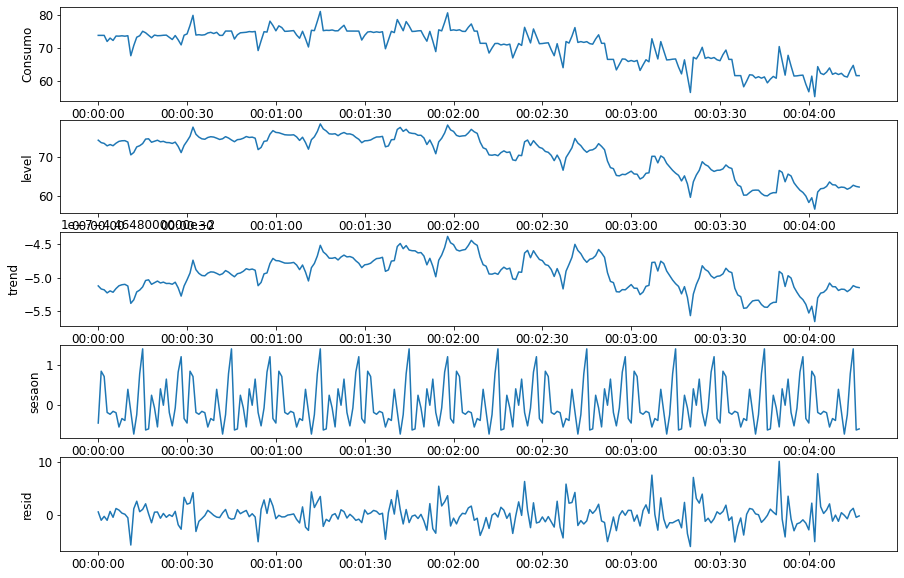

In [43]:
####Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt #suavizamiento exponencial

fit1 = ExponentialSmoothing(PCts, seasonal_periods=30, trend='add', seasonal='add', initialization_method="estimated",use_boxcox=False).fit()

plt.subplot(5, 1, 1)
plt.plot(PCts)
plt.ylabel('Consumo')
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level')
plt.subplot(5, 1, 3)
plt.plot(fit1.trend)
plt.ylabel('trend')
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon')
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid')

In [44]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,5.542475e-01,True
smoothing_trend,beta,8.231391e-09,True
smoothing_seasonal,gamma,7.282231e-09,True
initial_level,l.0,7.384884e+01,True
initial_trend,b.0,-4.464852e-02,True
initial_seasons.0,s.0,-4.678551e-01,True
initial_seasons.1,s.1,8.483571e-01,True
initial_seasons.2,s.2,7.141795e-01,True
initial_seasons.3,s.3,-1.985730e-01,True
initial_seasons.4,s.4,-2.449465e-01,True


<AxesSubplot:>

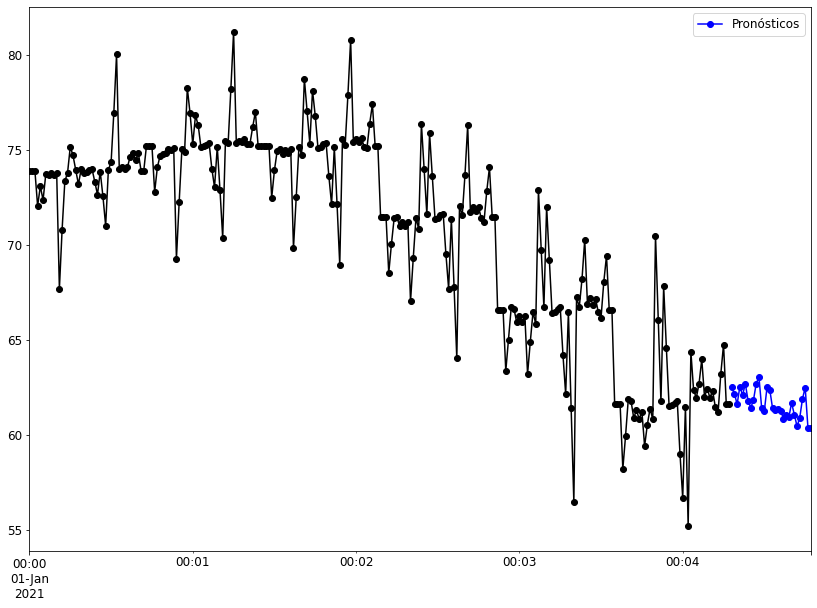

In [46]:
fcast1 = fit1.forecast(30).rename("Pronósticos")
ax = PCts.plot(color="black", marker="o", figsize=(14,10))
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)

### Arboles

In [47]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [48]:
PCdf = pd.DataFrame(dif_PCts.values,index=dif_PCts.index)
type(PCdf)
print(PCdf)

                         0
2021-01-01 00:00:00    NaN
2021-01-01 00:00:01  0.000
2021-01-01 00:00:02  0.000
2021-01-01 00:00:03 -1.857
2021-01-01 00:00:04  1.032
...                    ...
2021-01-01 00:04:13 -0.256
2021-01-01 00:04:14  2.034
2021-01-01 00:04:15  1.532
2021-01-01 00:04:16 -3.134
2021-01-01 00:04:17 -0.001

[258 rows x 1 columns]


In [49]:
for i in range(4,0,-1):
    df1[['t-'+str(i)]] = PCdf.shift(i)
    
print(df1)

                       t-4    t-3    t-2    t-1
2021-01-01 00:00:00    NaN    NaN    NaN    NaN
2021-01-01 00:00:01    NaN    NaN    NaN    NaN
2021-01-01 00:00:02    NaN    NaN    NaN  0.000
2021-01-01 00:00:03    NaN    NaN  0.000  0.000
2021-01-01 00:00:04    NaN  0.000  0.000 -1.857
...                    ...    ...    ...    ...
2021-01-01 00:04:13  0.403 -0.453  0.356 -0.878
2021-01-01 00:04:14 -0.453  0.356 -0.878 -0.256
2021-01-01 00:04:15  0.356 -0.878 -0.256  2.034
2021-01-01 00:04:16 -0.878 -0.256  2.034  1.532
2021-01-01 00:04:17 -0.256  2.034  1.532 -3.134

[258 rows x 4 columns]


In [50]:
df1['t'] = PCdf.values
print(df1.head(13))

                       t-4    t-3    t-2    t-1      t
2021-01-01 00:00:00    NaN    NaN    NaN    NaN    NaN
2021-01-01 00:00:01    NaN    NaN    NaN    NaN  0.000
2021-01-01 00:00:02    NaN    NaN    NaN  0.000  0.000
2021-01-01 00:00:03    NaN    NaN  0.000  0.000 -1.857
2021-01-01 00:00:04    NaN  0.000  0.000 -1.857  1.032
2021-01-01 00:00:05  0.000  0.000 -1.857  1.032 -0.722
2021-01-01 00:00:06  0.000 -1.857  1.032 -0.722  1.347
2021-01-01 00:00:07 -1.857  1.032 -0.722  1.347 -0.033
2021-01-01 00:00:08  1.032 -0.722  1.347 -0.033  0.103
2021-01-01 00:00:09 -0.722  1.347 -0.033  0.103 -0.117
2021-01-01 00:00:10  1.347 -0.033  0.103 -0.117  0.140
2021-01-01 00:00:11 -0.033  0.103 -0.117  0.140 -6.105
2021-01-01 00:00:12  0.103 -0.117  0.140 -6.105  3.113


In [51]:
df1_ENE = df1[5:]
print(df1_ENE)
df1_ENE.size

                       t-4    t-3    t-2    t-1      t
2021-01-01 00:00:05  0.000  0.000 -1.857  1.032 -0.722
2021-01-01 00:00:06  0.000 -1.857  1.032 -0.722  1.347
2021-01-01 00:00:07 -1.857  1.032 -0.722  1.347 -0.033
2021-01-01 00:00:08  1.032 -0.722  1.347 -0.033  0.103
2021-01-01 00:00:09 -0.722  1.347 -0.033  0.103 -0.117
...                    ...    ...    ...    ...    ...
2021-01-01 00:04:13  0.403 -0.453  0.356 -0.878 -0.256
2021-01-01 00:04:14 -0.453  0.356 -0.878 -0.256  2.034
2021-01-01 00:04:15  0.356 -0.878 -0.256  2.034  1.532
2021-01-01 00:04:16 -0.878 -0.256  2.034  1.532 -3.134
2021-01-01 00:04:17 -0.256  2.034  1.532 -3.134 -0.001

[253 rows x 5 columns]


1265

In [52]:
ENEsplit = df1_ENE.values
# split into lagged variables and original time series
X1= ENEsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =ENEsplit[:,-1] # slice all rows and last column, essentially separating out 't' column

print(X1)
print(y1)

[[ 0.     0.    -1.857  1.032]
 [ 0.    -1.857  1.032 -0.722]
 [-1.857  1.032 -0.722  1.347]
 ...
 [ 0.356 -0.878 -0.256  2.034]
 [-0.878 -0.256  2.034  1.532]
 [-0.256  2.034  1.532 -3.134]]
[-7.220e-01  1.347e+00 -3.300e-02  1.030e-01 -1.170e-01  1.400e-01
 -6.105e+00  3.113e+00  2.539e+00  4.430e-01  1.371e+00 -4.570e-01
 -7.480e-01 -7.750e-01  8.200e-01 -2.020e-01  4.100e-02  1.020e-01
  3.900e-02 -6.550e-01 -6.830e-01  1.215e+00 -1.310e+00 -1.541e+00
  2.950e+00  3.940e-01  2.604e+00  3.059e+00 -6.004e+00  1.020e-01
 -1.220e-01  1.170e-01  5.220e-01  2.080e-01 -3.640e-01  3.620e-01
 -9.280e-01  0.000e+00  1.317e+00  0.000e+00  0.000e+00 -2.435e+00
  1.303e+00  5.970e-01  9.700e-02  7.300e-02  2.060e-01 -8.700e-02
  1.250e-01 -5.830e+00  2.966e+00  2.789e+00 -1.180e-01  3.333e+00
 -1.318e+00 -1.630e+00  1.518e+00 -5.270e-01 -1.152e+00  4.200e-02
  1.020e-01  8.400e-02 -1.350e+00 -9.820e-01  2.122e+00 -2.266e+00
 -2.519e+00  5.087e+00 -9.800e-02  2.854e+00  2.990e+00 -5.857e+00
  1.

In [54]:
from pandas import read_csv
Y1 = y1
traintarget_size = int(len(Y1) * 0.9) # Set split
train_target, val_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)] ###80% entrenamiento y 10% validacion
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(val_target)))

Observations for Target: 253
Training Observations for Target: 227
Testing Observations for Target: 26


In [55]:
# Features Train-Test split
trainfeature_size = int(len(X1) * 0.9)
train_feature, val_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)] ##80% entrenamiento y 10% validacion
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(val_feature)))

Observations for feature: 253
Training Observations for feature: 227
Testing Observations for feature: 26


In [57]:
#Decision Tree Regresion Model
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regression model with default arguments
decision_tree_ENE = DecisionTreeRegressor() # max-depth not set
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_ENE.fit(train_feature, train_target)
# Check the score on train and test
print(decision_tree_ENE.score(train_feature, train_target))
print(decision_tree_ENE.score(val_feature,val_target))

1.0
-0.287061120488479


In [58]:
for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_ENE = DecisionTreeRegressor(max_depth=d)
    decision_tree_ENE.fit(train_feature, train_target)
    # Print out the scores on train and test, deberiamos añadir el conjunto de validación cuando tengamos más modelos
    print('max_depth=', str(d))
    print(decision_tree_ENE.score(train_feature, train_target))
    print(decision_tree_ENE.score(val_feature, val_target), '\n')

max_depth= 2
0.3074625839471814
-0.05042673005893605 

max_depth= 3
0.41275093627697057
-0.07256640710444273 

max_depth= 4
0.5497100958640415
0.09517546497078144 

max_depth= 5
0.6693057114006764
-0.06537459445931693 

max_depth= 7
0.8721806512192524
-0.1920830007148211 

max_depth= 8
0.9172114273365448
-0.1745317186095623 

max_depth= 10
0.9866291337303932
-0.2554051631248868 



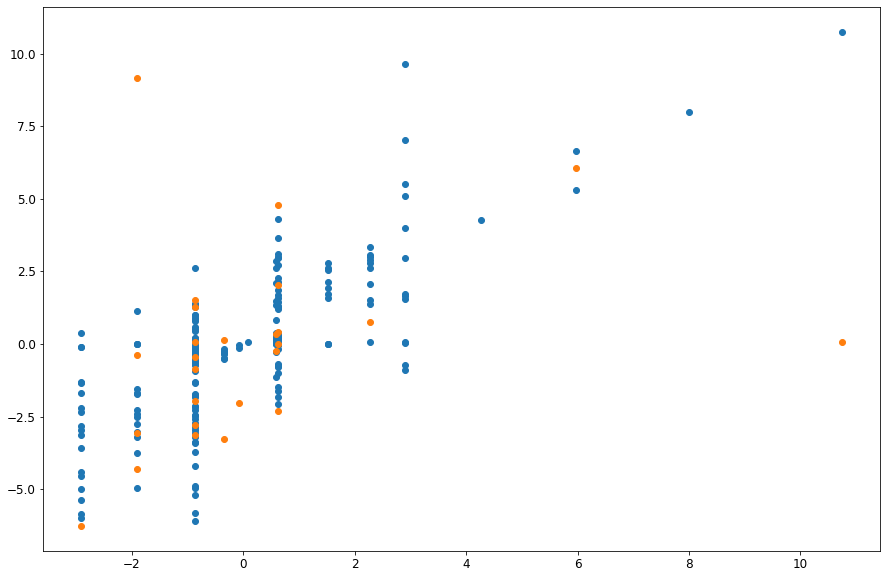

In [59]:
# Plot predicted against actual values
from matplotlib import pyplot as plt
# Use the best max_depth
decision_tree_ENE = DecisionTreeRegressor(max_depth=4) # fill in best max depth here
decision_tree_ENE.fit(train_feature, train_target)
# Predict values for train and test
train_prediction = decision_tree_ENE.predict(train_feature)
test_prediction = decision_tree_ENE.predict(val_feature)
# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train') # blue
plt.scatter(test_prediction, val_target, label='test') # orange
plt.show()

In [60]:
from sklearn import tree
listacaract=list(df1_ENE.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_ENE)
print(text_representation)

|--- feature_1 <= 2.92
|   |--- feature_3 <= -0.01
|   |   |--- feature_1 <= -0.33
|   |   |   |--- feature_3 <= -1.12
|   |   |   |   |--- value: [-1.92]
|   |   |   |--- feature_3 >  -1.12
|   |   |   |   |--- value: [0.59]
|   |   |--- feature_1 >  -0.33
|   |   |   |--- feature_0 <= -0.59
|   |   |   |   |--- value: [2.90]
|   |   |   |--- feature_0 >  -0.59
|   |   |   |   |--- value: [0.63]
|   |--- feature_3 >  -0.01
|   |   |--- feature_2 <= -3.05
|   |   |   |--- feature_0 <= 0.73
|   |   |   |   |--- value: [1.53]
|   |   |   |--- feature_0 >  0.73
|   |   |   |   |--- value: [-0.35]
|   |   |--- feature_2 >  -3.05
|   |   |   |--- feature_3 <= 2.61
|   |   |   |   |--- value: [-0.87]
|   |   |   |--- feature_3 >  2.61
|   |   |   |   |--- value: [-2.91]
|--- feature_1 >  2.92
|   |--- feature_3 <= -2.90
|   |   |--- feature_0 <= -1.94
|   |   |   |--- value: [10.75]
|   |   |--- feature_0 >  -1.94
|   |   |   |--- feature_0 <= -1.65
|   |   |   |   |--- value: [7.99]
|   |  

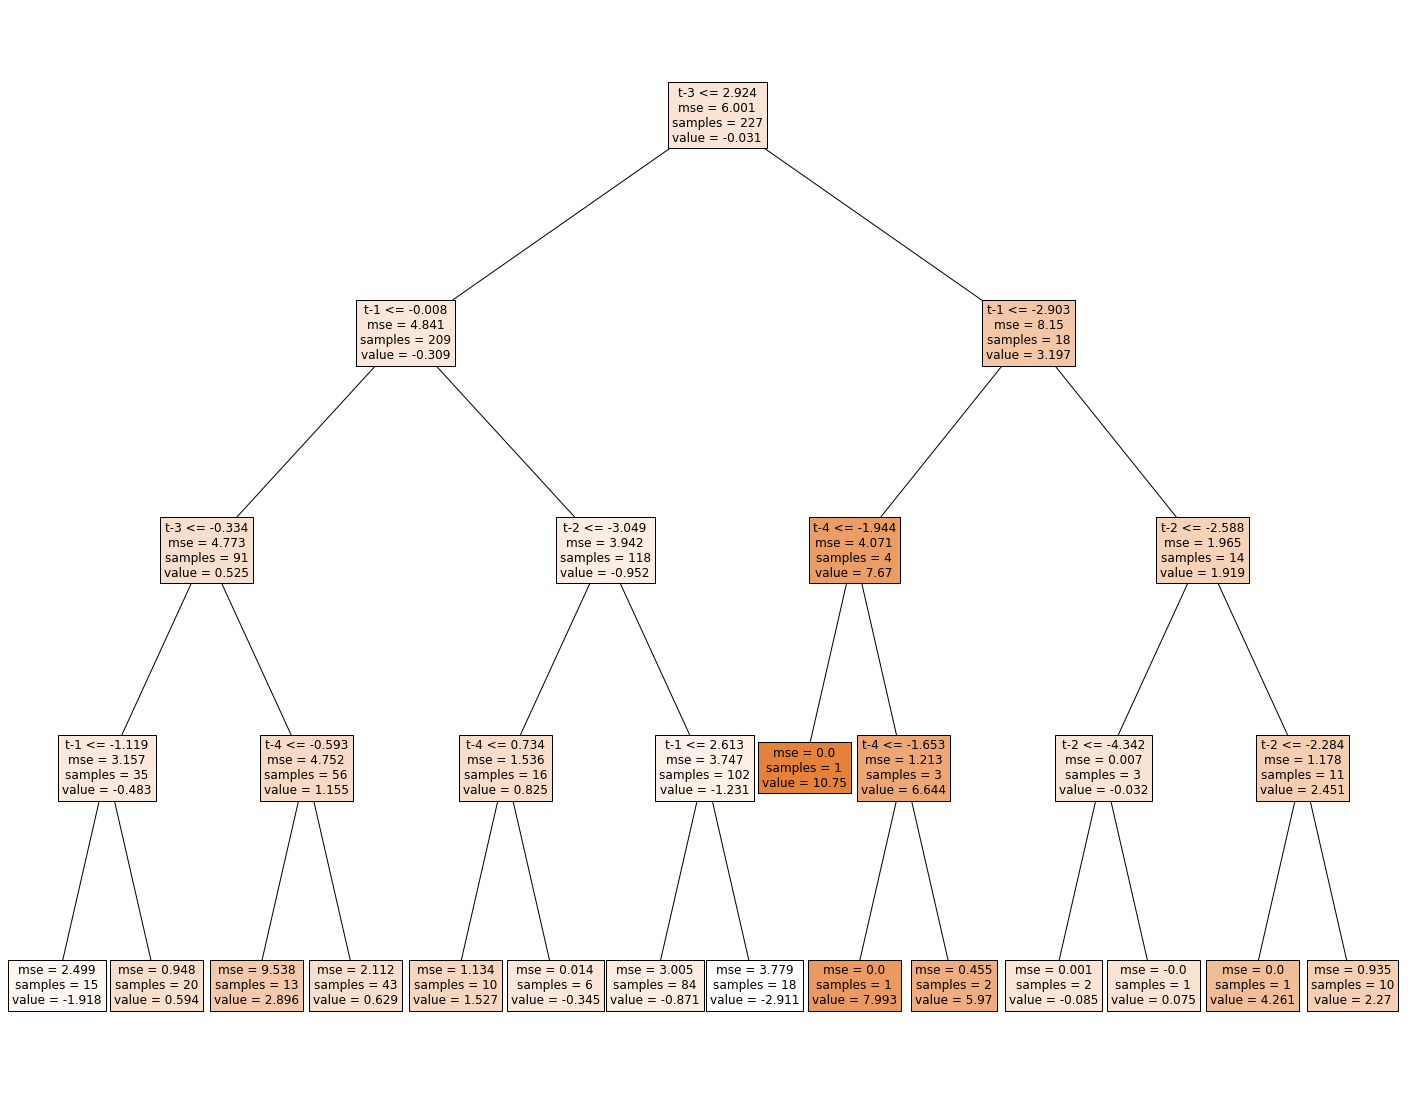

In [61]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_ENE,
feature_names=listacaract,
class_names=respuesta,
filled=True)

In [63]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(val_target.size)

indicetrian_test=df1_ENE.index
print(indicetrian_test.size) ###Tamaño del índice


227
227
26
26
253


In [64]:
indicetrain=indicetrian_test[0:226]
indiceval=indicetrian_test[226:253]

print(indicetrain.size)
print(indiceval.size)

targetjoint=np.concatenate((train_target,val_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

226
27
253
253


In [65]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test[0:507])
ObsvsPred.head(10)

,observado,Predicción
2021-01-01 00:00:05,-0.722,-0.870976
2021-01-01 00:00:06,1.347,0.593750
2021-01-01 00:00:07,-0.033,-0.870976
2021-01-01 00:00:08,0.103,0.593750
2021-01-01 00:00:09,-0.117,-0.870976
2021-01-01 00:00:10,0.140,0.629093
2021-01-01 00:00:11,-6.105,-0.870976
2021-01-01 00:00:12,3.113,0.629093
2021-01-01 00:00:13,2.539,1.527400
2021-01-01 00:00:14,0.443,-0.870976


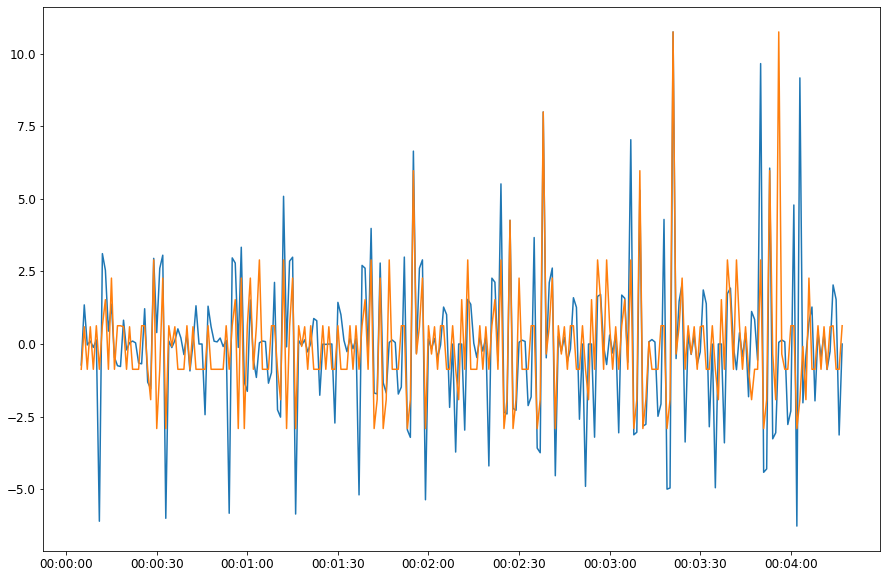

In [66]:
plt.plot(ObsvsPred)

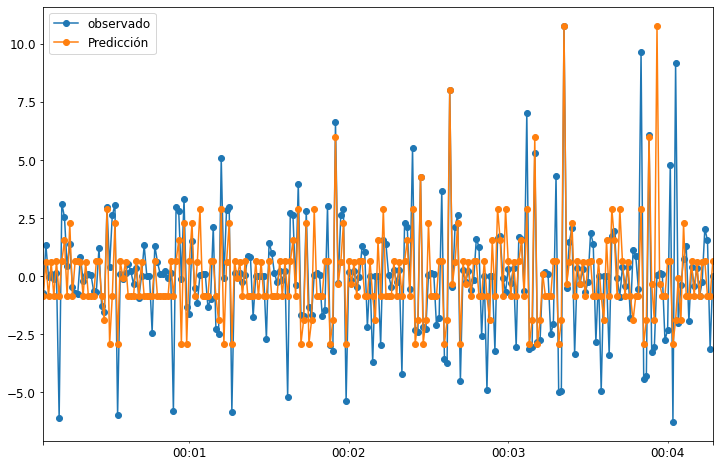

In [67]:
ax = ObsvsPred.plot( marker="o", figsize=(12,8))
ax.axvline(x=indicetrian_test[226].date(),color='red')

### redes neuronales

In [68]:
print(df1_ENE.head(7))
df1_ENE.shape

                       t-4    t-3    t-2    t-1      t
2021-01-01 00:00:05  0.000  0.000 -1.857  1.032 -0.722
2021-01-01 00:00:06  0.000 -1.857  1.032 -0.722  1.347
2021-01-01 00:00:07 -1.857  1.032 -0.722  1.347 -0.033
2021-01-01 00:00:08  1.032 -0.722  1.347 -0.033  0.103
2021-01-01 00:00:09 -0.722  1.347 -0.033  0.103 -0.117
2021-01-01 00:00:10  1.347 -0.033  0.103 -0.117  0.140
2021-01-01 00:00:11 -0.033  0.103 -0.117  0.140 -6.105


(253, 5)

In [69]:
# Split data
PRESsplit = df1_ENE.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1] # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]

print(X1)
print(y1)

[[ 0.     0.    -1.857  1.032]
 [ 0.    -1.857  1.032 -0.722]
 [-1.857  1.032 -0.722  1.347]
 ...
 [ 0.356 -0.878 -0.256  2.034]
 [-0.878 -0.256  2.034  1.532]
 [-0.256  2.034  1.532 -3.134]]
[-7.220e-01  1.347e+00 -3.300e-02  1.030e-01 -1.170e-01  1.400e-01
 -6.105e+00  3.113e+00  2.539e+00  4.430e-01  1.371e+00 -4.570e-01
 -7.480e-01 -7.750e-01  8.200e-01 -2.020e-01  4.100e-02  1.020e-01
  3.900e-02 -6.550e-01 -6.830e-01  1.215e+00 -1.310e+00 -1.541e+00
  2.950e+00  3.940e-01  2.604e+00  3.059e+00 -6.004e+00  1.020e-01
 -1.220e-01  1.170e-01  5.220e-01  2.080e-01 -3.640e-01  3.620e-01
 -9.280e-01  0.000e+00  1.317e+00  0.000e+00  0.000e+00 -2.435e+00
  1.303e+00  5.970e-01  9.700e-02  7.300e-02  2.060e-01 -8.700e-02
  1.250e-01 -5.830e+00  2.966e+00  2.789e+00 -1.180e-01  3.333e+00
 -1.318e+00 -1.630e+00  1.518e+00 -5.270e-01 -1.152e+00  4.200e-02
  1.020e-01  8.400e-02 -1.350e+00 -9.820e-01  2.122e+00 -2.266e+00
 -2.519e+00  5.087e+00 -9.800e-02  2.854e+00  2.990e+00 -5.857e+00
  1.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [71]:
X_train, X_val, y_train, y_val=train_test_split(X1,y1,test_size=0.1, train_size=0.9, shuffle=False)

print(X_train.shape) #80% DEL 90%
print(X_val.shape) #20 DEL 90%
print(y_train.shape)
print(y_val.shape)

(227, 4)
(26, 4)
(227,)
(26,)


In [72]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_train

array([[0.36220706, 0.36220706, 0.25203204, 0.42343518],
       [0.36220706, 0.25203204, 0.42343518, 0.31937111],
       [0.25203204, 0.42343518, 0.31937111, 0.442124  ],
       [0.42343518, 0.31937111, 0.442124  , 0.36024918],
       [0.31937111, 0.442124  , 0.36024918, 0.36831801],
       [0.442124  , 0.36024918, 0.36831801, 0.3552655 ],
       [0.36024918, 0.36831801, 0.3552655 , 0.3705132 ],
       [0.36831801, 0.3552655 , 0.3705132 , 0.        ],
       [0.3552655 , 0.3705132 , 0.        , 0.54690003],
       [0.3705132 , 0.        , 0.54690003, 0.51284485],
       [0.        , 0.54690003, 0.51284485, 0.38849006],
       [0.54690003, 0.51284485, 0.38849006, 0.44354791],
       [0.51284485, 0.38849006, 0.44354791, 0.33509344],
       [0.38849006, 0.44354791, 0.33509344, 0.31782854],
       [0.44354791, 0.33509344, 0.31782854, 0.31622664],
       [0.33509344, 0.31782854, 0.31622664, 0.41085731],
       [0.31782854, 0.31622664, 0.41085731, 0.35022249],
       [0.31622664, 0.41085731,

In [73]:
import tensorflow.keras as keras

model=keras.models.Sequential([keras.layers.Dense(8,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
#primera capa oculta con 32 unidades, fun. relu y dimensión de entrada    
#capa de salida con una de salida
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
8/8 [==============================] - 1s 83ms/step - loss: 5.5932 - val_loss: 10.2167
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 6.0468 - val_loss: 10.1973
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 6.1106 - val_loss: 10.1756
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 5.1169 - val_loss: 10.1522
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 5.8431 - val_loss: 10.1283
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 5.9986 - val_loss: 10.1077
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 5.4935 - val_loss: 10.0880
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 6.9875 - val_loss: 10.0695
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 6.7947 - val_loss: 10.0531
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 6.0452 - val_loss: 10.0403
Epoch 11/100
8/8 [

<AxesSubplot:>

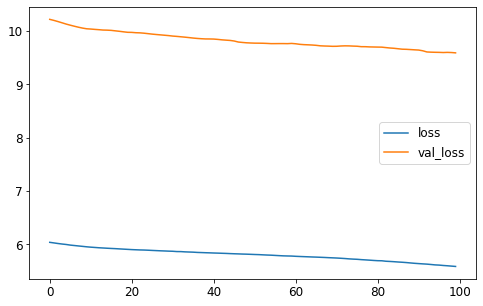

In [75]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [77]:
mse_test=model.evaluate(X_val,y_val)
print(mse_test)

1/1 [==============================] - 0s 15ms/step - loss: 9.5893
9.589251518249512


In [78]:
ypred=model.predict(X_val)
print(ypred)

[[-2.3268531e-01]
 [ 4.6484804e-01]
 [-1.0472540e+00]
 [-1.8447547e-01]
 [ 4.4879770e-01]
 [-5.3189039e-01]
 [-1.1184253e-01]
 [ 3.7570313e-02]
 [ 4.9884096e-03]
 [ 5.5145018e-02]
 [-2.5141114e-01]
 [-3.2375671e-02]
 [ 5.1454800e-01]
 [-6.4507127e-01]
 [ 5.5514354e-01]
 [-5.7800198e-01]
 [-7.0632622e-02]
 [ 1.4133006e-03]
 [-2.5478750e-04]
 [-2.1689515e-01]
 [ 2.0956479e-02]
 [-9.5859095e-02]
 [-1.0354668e-02]
 [-1.7989333e-01]
 [-1.4440665e-01]
 [ 8.7063894e-02]]


Text(0.5, 0, 'Index')

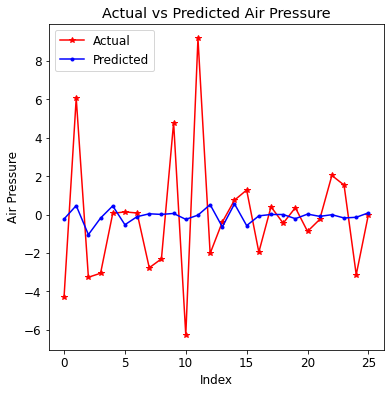

In [79]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_val.size), y_val, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')